In [1]:
from tensorflow.python.summary.summary_iterator import summary_iterator

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [49]:
path = "/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3_seed_1_agent_TD3/events.out.tfevents.1599507860.architect.6470.0"
path1 = "/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3_seed_2_agent_TD3/events.out.tfevents.1599507860.architect.6471.0"
path2 = "/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3_seed_3_agent_TD3/events.out.tfevents.1599507860.architect.6472.0"
path3 = "/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3_seed_4_agent_TD3/events.out.tfevents.1599507860.architect.6473.0"

In [5]:
p1="/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3lr_critic_0.001_update_freq_50_num_q_target_6_seed_1_agent_TD3_ad/events.out.tfevents.1599731008.architect.25365.0"
p2="/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3lr_critic_0.05lr_actor_0.005_update_freq_50_num_q_target_6_seed_2_agent_TD3_ad/events.out.tfevents.1599735305.architect.29334.0"
p3 = "/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3lr_critic_0.05lr_actor_0.005_update_freq_50_num_q_target_6_seed_3_agent_TD3_ad/events.out.tfevents.1599735305.architect.29335.0"
p4 = "/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3lr_critic_0.05lr_actor_0.005_update_freq_50_num_q_target_6_seed_4_agent_TD3_ad/events.out.tfevents.1599735305.architect.29336.0"


In [19]:
td_ad1 = "/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3lr_critic_0.01lr_actor_0.001_update_freq_50_num_q_target_6_seed_1_agent_TD3_ad/events.out.tfevents.1599815632.architect.11877.0"
td_ad2 = "/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3lr_critic_0.01lr_actor_0.001_update_freq_50_num_q_target_6_seed_2_agent_TD3_ad/events.out.tfevents.1599815632.architect.11878.0"
td_ad3 = "/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3lr_critic_0.01lr_actor_0.001_update_freq_50_num_q_target_6_seed_3_agent_TD3_ad/events.out.tfevents.1599815632.architect.11879.0"
td_ad4 = "/home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3lr_critic_0.01lr_actor_0.001_update_freq_50_num_q_target_6_seed_4_agent_TD3_ad/events.out.tfevents.1599815632.architect.11880.0"

In [57]:
mean_value, min_mean, max_mean, steps = createMean(path1,path1,path2,path3,"Reward")

In [60]:
mean_value1, min_mean1, max_mean1, steps1 = createMean(td_ad1,td_ad2,td_ad3,td_ad4, "Reward")

error1
error2
error3
error4


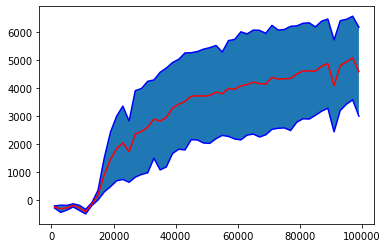

In [62]:
plt.plot(steps1, min_mean1, color='b')
plt.plot(steps1, max_mean1, color='b')
plt.fill_between(steps1, min_mean1, max_mean1)
plt.plot(steps1, mean_value1,color='r')
plt.savefig("TD3.png")

In [61]:
len(steps), len(steps1)

(250, 50)

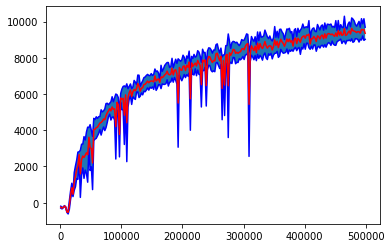

In [63]:
plt.plot(steps, min_mean, color='b')
plt.plot(steps, max_mean, color='b')
plt.fill_between(steps, min_mean, max_mean)
plt.plot(steps, mean_value,color='r')
plt.savefig("TD3.png")

In [21]:
mean_value, min_mean, max_mean = createMean(p2,p2,p3,p4)

NotFoundError: /home/architect/hiwi/bachelorProject/mujoco_env/vector/halfcheetah/runs/HalfCheetah-v3lr_critic_0.05lr_actor_0.005_update_freq_50_num_q_target_6_seed_2_agent_TD3_ad/events.out.tfevents.1599735305.architect.29334.0; No such file or directory

In [46]:
def createMean(path, path1, path2, path3, name="Reward"):
    value = []
    steps = []
    try:
        for e in summary_iterator(path):  
            for v in e.summary.value:
                if v.tag == name:
                    value.append(v.simple_value)
                    steps.append(e.step)
    except:
        print("error1")
    
    try:
        value1 = []
        steps1 = []
        for e in summary_iterator(path1):
            for v in e.summary.value:
                if v.tag == name:
                    value1.append(v.simple_value)
                    steps1.append(e.step)
    except:
        print("error2")
    try:
        value2 = []
        steps2 = []
        for e in summary_iterator(path2):
            for v in e.summary.value:
                if v.tag == name:
                    value2.append(v.simple_value)
                    steps2.append(e.step)
    except:
        print("error3")
    
    try:
        
        value3 = []
        steps3 = []
        for e in summary_iterator(path3):

            for v in e.summary.value:
                if v.tag == name:
                    value3.append(v.simple_value)
                    steps3.append(e.step)
    except:
        print("error4")
    
    assert len(value) == len(value1) == len(value2) == len(value3)
    mean_value = []
    for v1, v2, v3, v4 in zip(value, value1, value2, value3):
        mean_value.append((v1+v2+v3+v4)/4.)
    var = []
    for v1, v2, v3, v4, mean in zip(value, value1, value2, value3, mean_value):
        summe = ((v1 -mean)**2 + (v2 -mean)**2 + (v3 -mean)**2 + (v4 -mean)**2)/4.
        var.append(np.sqrt(summe))
    max_mean = []
    min_mean = []
    for v, m in zip(var, mean_value):
        max_mean.append(m+v)
        min_mean.append(m-v)
    return mean_value, min_mean, max_mean, steps
    
    

In [30]:
value = []
steps = []
try:
    for e in summary_iterator(td_ad1):
        for v in e.summary.value:
            if v.tag == 'Reward':
                value.append(v.simple_value)
                steps.append(e.step)
except :
    print("error")
    


error


In [45]:
assert 3==3 and 3==4

AssertionError: 

In [ ]:
value = []
steps = []
try:
    for e in summary_iterator(td_ad1):
        for v in e.summary.value:
            if v.tag == name:
                value.append(v.simple_value)
                steps.append(e.step)
except :
    print("error")

In [38]:
value1 = []
steps1 = []
try:
    for e in summary_iterator(td_ad2):
        for v in e.summary.value:
            if v.tag == 'Reward':
                value1.append(v.simple_value)
                steps1.append(e.step)
except :
    print("error")

error


In [42]:
value1 = []
steps1 = []
try:
    for e in summary_iterator(td_ad2):
        for v in e.summary.value:
            if v.tag == 'Reward':
                value1.append(v.simple_value)
                steps1.append(e.step)
except :
    print("error")

error


In [39]:
len(steps1), len(value1)

(50, 50)

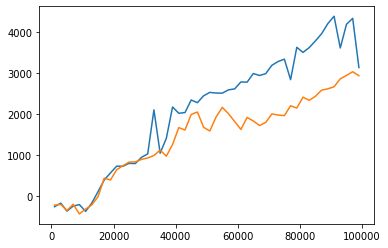

In [40]:
len(steps), len(value)
plt.plot(steps, value)
plt.plot(steps1, value1)
plt.plot(steps1, value1)
plt.plot(steps1, value1)

In [11]:
value1 = []
steps1 = []
for e in summary_iterator(path1):
    
    for v in e.summary.value:
        if v.tag == 'Reward':
            value1.append(v.simple_value)
            steps1.append(e.step)
            #print(v.simple_value)


In [12]:
value2 = []
steps2 = []
for e in summary_iterator(path2):
    
    for v in e.summary.value:
        if v.tag == 'Reward':
            value2.append(v.simple_value)
            steps2.append(e.step)
            #print(v.simple_value)

In [13]:
value3 = []
steps3 = []
for e in summary_iterator(path3):
    
    for v in e.summary.value:
        if v.tag == 'Reward':
            value3.append(v.simple_value)
            steps3.append(e.step)
            #print(v.simple_value)

In [28]:
steps[50], value[50]

(101000, 5198.2763671875)

In [38]:
steps1[50], value1[50]

(101000, 5337.12646484375)

In [39]:
mean_value = []
for v1, v2, v3, v4 in zip(value, value1, value2, value3):
    mean_value.append((v1+v2+v3+v4)/4.)

In [40]:
mean_value

[-275.11956787109375,
 -332.5559425354004,
 -260.74877548217773,
 -220.62720108032227,
 -261.9044609069824,
 -509.35485076904297,
 -509.2940673828125,
 -195.34925270080566,
 292.67033195495605,
 930.0872421264648,
 836.3318481445312,
 1334.0718078613281,
 1354.700294494629,
 2114.0560607910156,
 2123.896682739258,
 2744.2596435546875,
 2167.785614013672,
 2842.3182983398438,
 2768.5194396972656,
 3050.8684692382812,
 3043.494598388672,
 3330.2664489746094,
 3288.1796264648438,
 3345.5305786132812,
 3589.8628845214844,
 2842.0709838867188,
 2843.095916748047,
 4273.742248535156,
 4302.8973388671875,
 4343.476745605469,
 4374.689270019531,
 4482.390930175781,
 4563.467712402344,
 4696.1842041015625,
 4832.488464355469,
 4829.44677734375,
 4853.5220947265625,
 4572.1514892578125,
 5155.930419921875,
 5181.315185546875,
 5275.890380859375,
 5221.3250732421875,
 5557.9124755859375,
 4883.4278564453125,
 5214.734130859375,
 4316.764801025391,
 5625.5006103515625,
 5665.1387939453125,
 4574.1

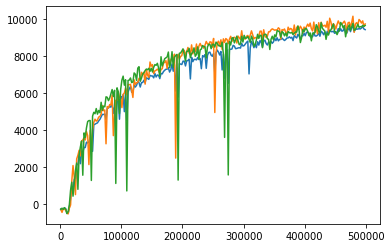

In [60]:
plt.plot(steps, mean_value)
plt.plot(steps, value)
#plt.plot(steps, value1)
plt.plot(steps, value2)
#plt.plot(steps, value3)

In [52]:
var = []
for v1, v2, v3, v4, mean in zip(value, value1, value2, value3, mean_value):
    print((v1-mean)**2)
    summe = ((v1 -mean)**2 + (v2 -mean)**2 + (v3 -mean)**2 + (v4 -mean)**2)/4.
    var.append(np.sqrt(summe))

957.4631601283327
16229.210109938882
33.90335245967435
7163.404509963948
2434.6479286468966
986.1987150088535
1171.8503499180079
883.1654434858101
125025.02090605849
102105.002804983
1520445.3867119588
10850.755903542973
732209.2581509035
100051.8021892989
249797.69414247037
23043.29188479483
181967.4647368947
299009.3168960847
467515.8570116097
267654.3443621136
166606.2974866936
332491.780174979
160489.8763471283
1495757.2163195945
140132.07791189197
259.77357015386224
1348963.7915103892
16120.799992684275
73386.02957727015
15520.150243077427
23203.318421635777
42456.19502905384
23234.679381553084
26237.474526777864
224769.34001461044
42136.18183732033
48675.121307745576
1761327.1873022467
10475.092714369297
3.2718945145606995
7748.512375891209
14166.72396697104
103615.8534861952
1433175.1955140978
187765.85847908258
1639701.1175895864
1446.7566855102777
168932.94088484347
1360099.3430939354
8315.783519983292
226106.5188422799
517.9069176316261
1014758.7690521814
29778.23770290613
19

In [53]:
var

[47.121971212925054,
 82.05378320796439,
 23.524394446910726,
 52.447132256707974,
 36.85156200371484,
 28.020155206215176,
 77.64826529850302,
 219.78498775949203,
 310.4005256559168,
 309.24358899109245,
 719.9744291014109,
 443.7186894687306,
 687.5651456794534,
 457.94583677436117,
 792.6166074811542,
 168.82607216471797,
 1093.4708180498494,
 764.4773778981008,
 765.0766593267055,
 990.1698202375364,
 720.9332421389146,
 997.5421754156494,
 1268.3359668400913,
 852.8108612513317,
 1059.4035623661373,
 971.4911713403824,
 1552.683783744091,
 526.5212095120053,
 485.7808652085952,
 540.2445484813571,
 411.09778887104665,
 425.7925636871206,
 316.71019367326375,
 603.0280031000649,
 501.9012024755323,
 395.07295573471544,
 505.1962083395349,
 950.3207343289096,
 455.8397546172581,
 282.7271650759541,
 290.35703532925663,
 474.63085792144636,
 523.3823565956613,
 779.4159139026166,
 585.1097498939982,
 1862.1873802837767,
 389.3102261830653,
 420.40518404672656,
 1218.686924294919,
 2

In [54]:
max_mean = []
min_mean = []
for v, m in zip(var, mean_value):
    max_mean.append(m+v)
    min_mean.append(m-v)

In [55]:
max_mean

[-227.9975966581687,
 -250.502159327436,
 -237.22438103526702,
 -168.1800688236143,
 -225.0528989032676,
 -481.3346955628278,
 -431.6458020843095,
 24.43573505868636,
 603.0708576108728,
 1239.3308311175574,
 1556.306277245942,
 1777.7904973300588,
 2042.2654401740824,
 2572.0018975653766,
 2916.5132902204123,
 2913.0857157194055,
 3261.256432063521,
 3606.7956762379445,
 3533.596099023971,
 4041.0382894758177,
 3764.4278405275863,
 4327.808624390259,
 4556.5155933049355,
 4198.341439864613,
 4649.266446887622,
 3813.5621552271014,
 4395.779700492138,
 4800.263458047161,
 4788.678204075783,
 4883.721294086826,
 4785.787058890578,
 4908.183493862902,
 4880.177906075607,
 5299.212207201627,
 5334.389666831001,
 5224.519733078466,
 5358.718303066097,
 5522.472223586722,
 5611.770174539133,
 5464.042350622829,
 5566.247416188631,
 5695.955931163634,
 6081.294832181598,
 5662.843770347929,
 5799.843880753373,
 6178.952181309167,
 6014.810836534628,
 6085.543977992039,
 5792.8675273222625,
 

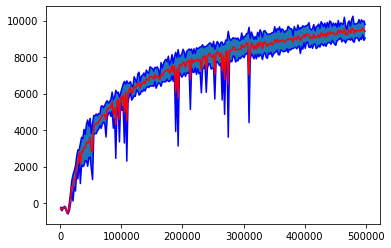

In [69]:
plt.plot(steps, min_mean, color='b')
plt.plot(steps, max_mean, color='b')
plt.fill_between(steps, min_mean, max_mean)
plt.plot(steps, mean_value,color='r')
plt.savefig("TD3.png")

In [67]:
plt.savefig("TD3.png")

<Figure size 432x288 with 0 Axes>

In [72]:
mean_value, min_mean, max_mean =createMean(p1,p2,p3,p4)

DataLossError: truncated record at 15800378